# Задача №2, “Преобразование Фурье”
## Феофанова Мария, 696 группа
---
Далее представлена реализация [дискретного преобразования Фурье](http://e-maxx.ru/algo/fft_multiply) за O(n*log(n)). 

Проводятся эксперименты с 5 функциями: f = x, x^2, sin x, sin x^2, sin x / x.  
Для каждой строится график функции, ДПФ, обратного ДПФ, и проводятся несколько экспериментов: 
    отбрасывая какое-то количество D последних коэффициентов в векторе ДПФ, и вычисляя обратное ДПФ, 
    сравниваем исходную функцию с новой и находим оптимальное D, для которого видна разница.

Далее идет реализация дискретного преобразования Фурье, а также необходимых в процессе функций.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Диапазон значений от 0 до 10 с частотой 100
t = np.arange(0.1, 10.34, 0.01)

# Печатает входную функцию
def decorator(func):
    def wrapper(str, axis):
        plt.figure(1)
        plt.axis(axis)
        plt.title(str)
        plt.plot(t, func(t))
        plt.show()
    return wrapper

# Печатает комплексные функции
def func_printer(x, axis, func_list, str):
    func_real = [c.real for c in func_list]
    func_imag = [c.imag for c in func_list]
    plt.figure(1)
    plt.axis(axis)
    plt.title(str)
    plt.plot(x, func_real, x, func_imag)
    plt.show()

# Дискретное преобразование Фурье.
# Метод "разделяй и влавствуй", за счет которого получилась асимптотика O(nlogn)
def DFT(vec, inverted):
    a = list(vec)
    n = len(a)
    if n <= 1:
        return a
    a0 = [a[c * 2] for c in range((int)((n + 1) / 2))]
    a1 = [a[2 * c + 1] for c in range((int)(n / 2))]
    a0 = DFT(a0, inverted)
    a1 = DFT(a1, inverted)
    ang = 2 * np.pi / n
    if inverted:
        ang = -ang
    w = 1 + 0j
    wn = complex(np.cos(ang), np.sin(ang))
    for i in range((int)(n / 2)):
        a[i] = a0[i] + w * a1[i]
        a[i + (int)(n / 2)] = a0[i] - w * a1[i]
        if inverted:
            a[i] /= 2 + 0j
            a[i + (int)(n / 2)] /= 2 + 0j
        w *= wn
    return a

# Функция проводит эксперимент, отбрасывая несколько последних коэффициентов.
def fft_experiment(func, axis, D):
    title = "FFT reversed function without last " + str(D) + " coefficients"
    for i in range((int)(len(func) - D), len(func)) :
        func[i] = 0 + 0j
    d_func = DFT(func, True)
    func_printer(t, axis, d_func, title)
    
# Печатает функцию, ее ффт и обратное ффт.
def print_fft(func):
    def wrapper(axis):
        func_list = [f(i / 100) + 0j for i in range(1, 1025)]
        f_dec = decorator(func)
        f_dec("Input function", axis)
        fft = DFT(func_list, False)
        func_printer(t, axis, fft, "FFT function")
        fft_r = DFT(fft, True)
        func_printer(t, axis, fft_r, "FFT reversed function")
        return fft
    return wrapper

Экспериментируем с f = x. Покажем сначала, как выглядит сама функция, ее ДПФ и обратное ДПФ.

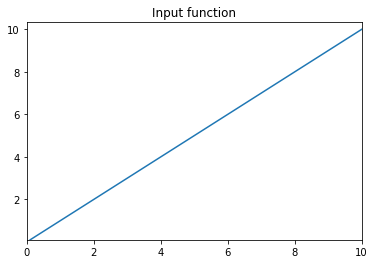

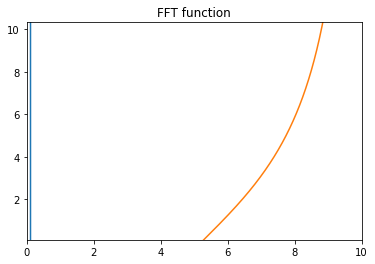

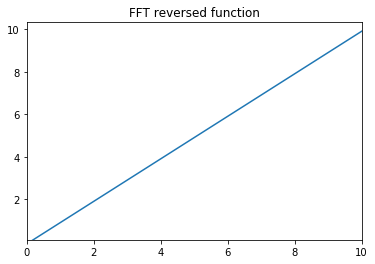

In [42]:
def f(x):
    return x

axis = [0, 10, min(f(t)), max(f(t))]
f_printer = print_fft(f)
fft = f_printer(axis)

Варьируем D. Уже без 1 коэффициента все портится. 

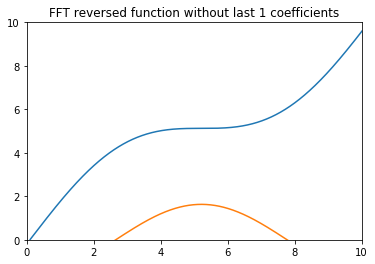

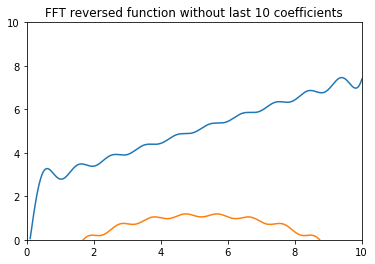

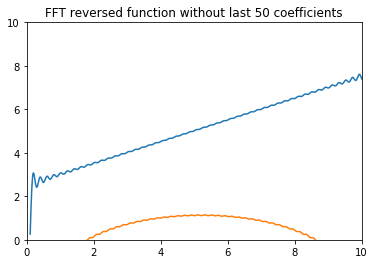

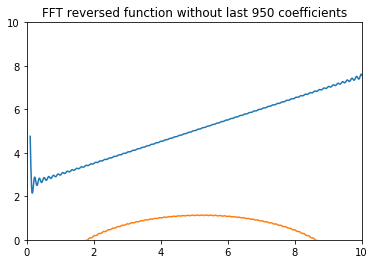

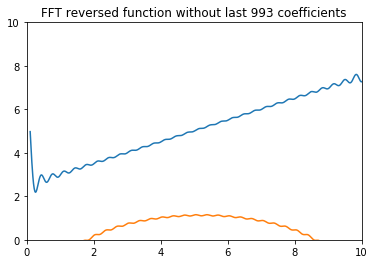

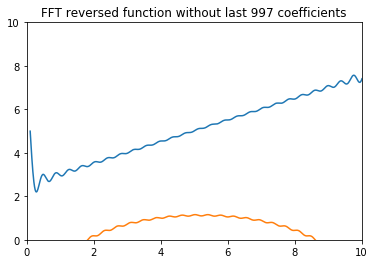

In [24]:
fft_experiment(fft, axis, 1)
fft_experiment(fft, axis, 10)
fft_experiment(fft, axis, 50)
fft_experiment(fft, axis, 950) 
fft_experiment(fft, axis, 993)
fft_experiment(fft, axis, 997)

Построим x^2.

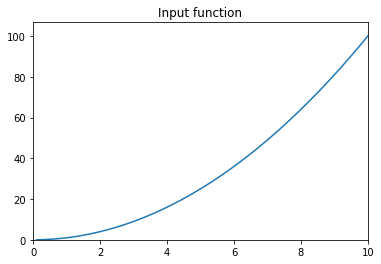

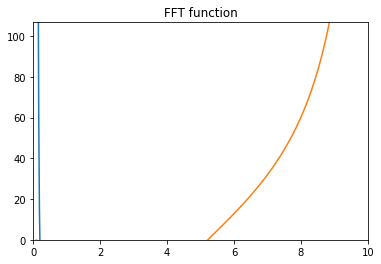

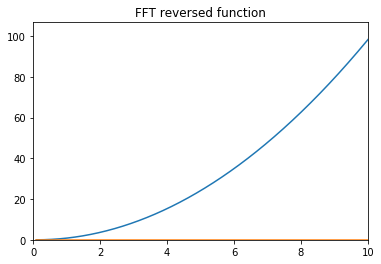

In [43]:
def f(x):
    return x**2

axis = [0, 10, min(f(t)), max(f(t))]
f_printer = print_fft(f)
fft = f_printer(axis)

При D от 1 до 10 видно, как портится парабола.

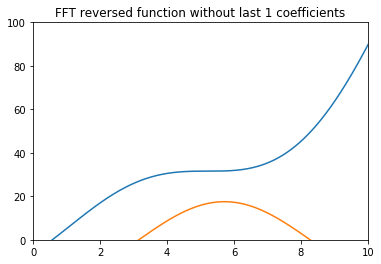

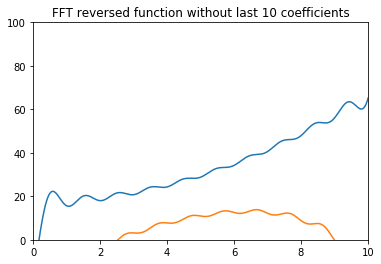

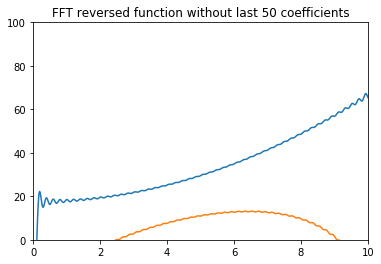

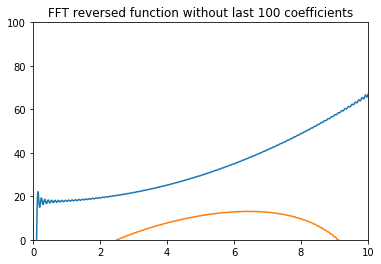

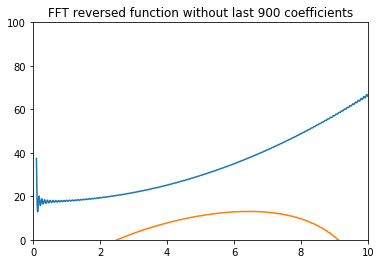

In [26]:
fft_experiment(fft, axis, 1)
fft_experiment(fft, axis, 10)
fft_experiment(fft, axis, 50)
fft_experiment(fft, axis, 100) 
fft_experiment(fft, axis, 900) 

Построим sin(x).

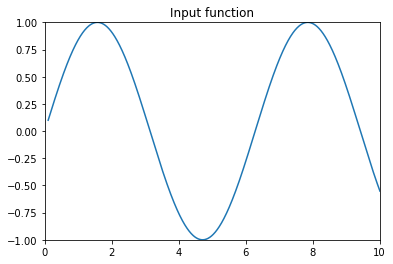

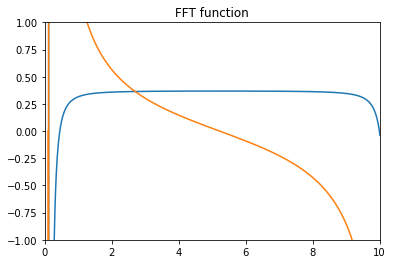

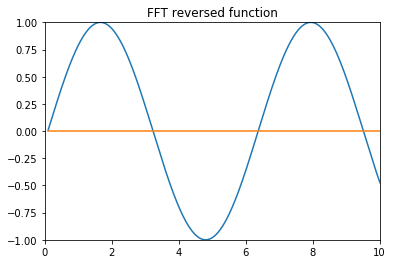

In [44]:
def f(x):
    return np.sin(x)

axis = [0, 10, min(f(t)), max(f(t))]
f_printer = print_fft(f)
fft = f_printer(axis)

Начиная с D~50, видно, как 'сплющилась' синусоида.

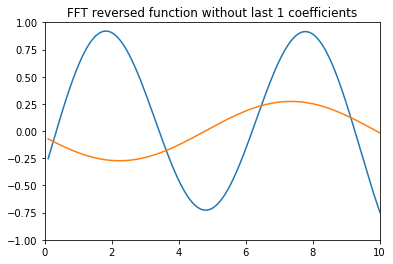

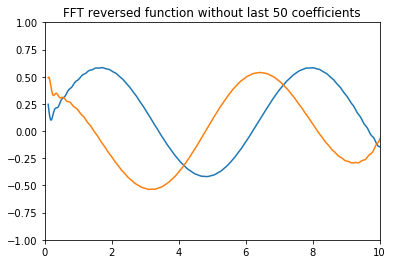

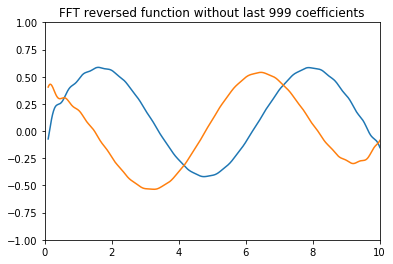

In [29]:
fft_experiment(fft, axis, 1)
fft_experiment(fft, axis, 50)
fft_experiment(fft, axis, 999)

Построим sin(x^2). 

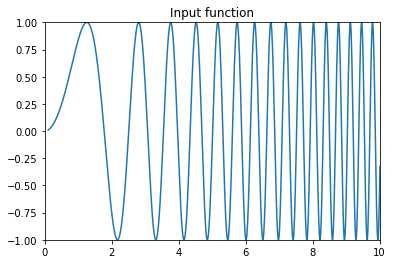

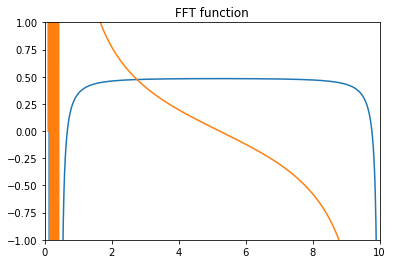

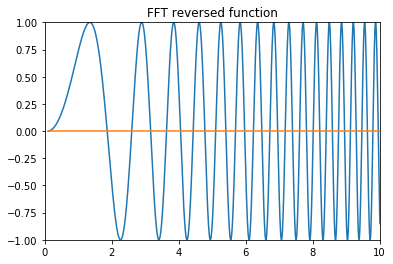

In [45]:
def f(x):
    return np.sin(x**2)

axis = [0, 10, min(f(t)), max(f(t))]
f_printer = print_fft(f)
fft = f_printer(axis)

При D от 10 до 50 кривая сильно деформируется.

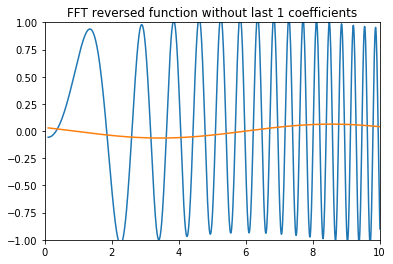

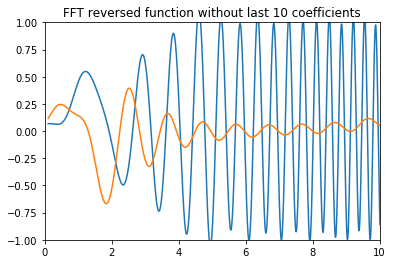

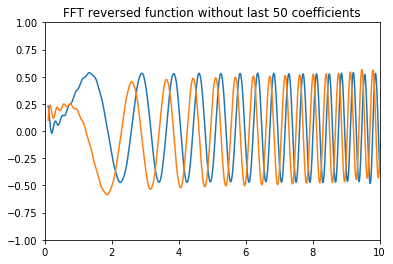

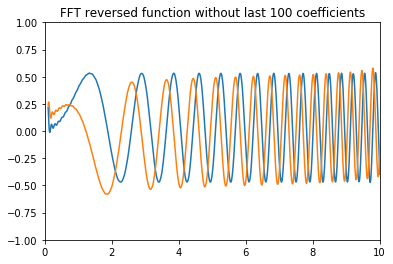

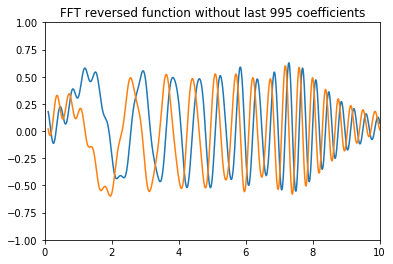

In [33]:
fft_experiment(fft, axis, 1)
fft_experiment(fft, axis, 10)
fft_experiment(fft, axis, 50)
fft_experiment(fft, axis, 100) 
fft_experiment(fft, axis, 995)

Наконец, sin (x) / x. 

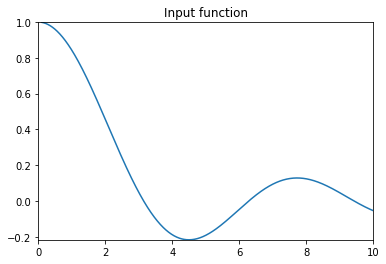

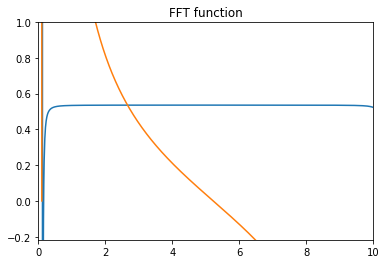

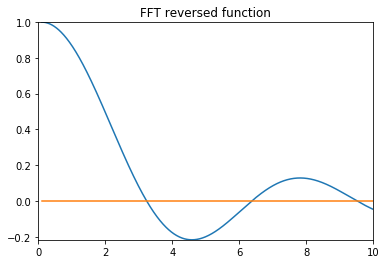

In [46]:
def f(x):
    if type(x) == float and x == 0:
        return 1
    return np.sin(x) / (x)

axis = [0, 10, min(f(t)), max(f(t))]
f_printer = print_fft(f)
fft = f_printer(axis)

При D~10 результат уже не похож.

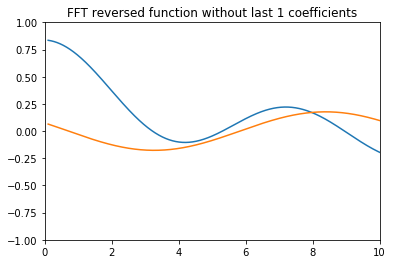

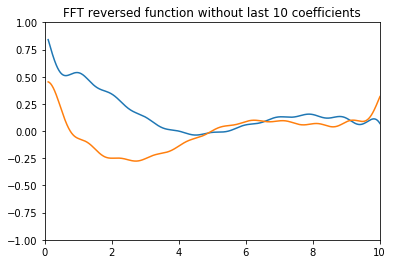

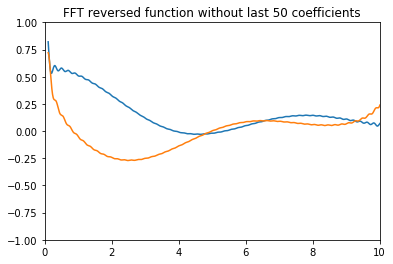

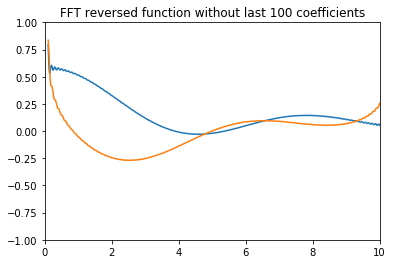

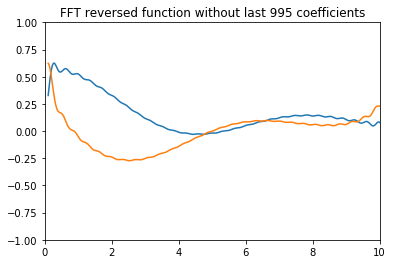

In [40]:
fft_experiment(fft, axis, 1)
fft_experiment(fft, axis, 10)
fft_experiment(fft, axis, 50)
fft_experiment(fft, axis, 100) 
fft_experiment(fft, axis, 995)